# Youtube Likes Prediction  
This notebook analys and predict the likes on youtube videos

## 0. import and download data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [14]:
!kaggle datasets download datasnaek/youtube-new

Dataset URL: https://www.kaggle.com/datasets/datasnaek/youtube-new
License(s): CC0-1.0
youtube-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! mkdir youtube-new
!tar -xf youtube-new.zip -C youtube-new

A subdirectory or file youtube-new already exists.


^C


## 1. EDA

In [15]:
df = pd.read_csv("./youtube-new/USvideos.csv")

In [16]:
df.head().T

,0,1,2,3,4
video_id,2kyS6SvSYSE,1ZAPwfrtAFY,5qpjK5DgCt4,puqaWrEC7tY,d380meD0W0M
trending_date,17.14.11,17.14.11,17.14.11,17.14.11,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE,The Trump Presidency: Last Week Tonight with J...,"Racist Superman | Rudy Mancuso, King Bach & Le...",Nickelback Lyrics: Real or Fake?,I Dare You: GOING BALD!?
channel_title,CaseyNeistat,LastWeekTonight,Rudy Mancuso,Good Mythical Morning,nigahiga
category_id,22,24,23,24,24
publish_time,2017-11-13T17:13:01.000Z,2017-11-13T07:30:00.000Z,2017-11-12T19:05:24.000Z,2017-11-13T11:00:04.000Z,2017-11-12T18:01:41.000Z
tags,SHANtell martin,"last week tonight trump presidency|""last week ...","racist superman|""rudy""|""mancuso""|""king""|""bach""...","rhett and link|""gmm""|""good mythical morning""|""...","ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
views,748374,2418783,3191434,343168,2095731
likes,57527,97185,146033,10172,132235
dislikes,2966,6146,5339,666,1989


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]).applymap(lambda x: f"{x:0.3f}")

,category_id,views,likes,dislikes,comment_count
count,40949.000,40949.000,40949.000,40949.000,40949.000
mean,19.972,2360784.638,74266.702,3711.401,8446.804
std,7.568,7394113.760,228885.338,29029.706,37430.487
min,1.000,549.000,0.000,0.000,0.000
25%,17.000,242329.000,5424.000,202.000,614.000
50%,24.000,681861.000,18091.000,631.000,1856.000
75%,25.000,1823157.000,55417.000,1938.000,5755.000
85%,26.000,3162364.800,108759.400,3771.800,10856.600
90%,27.000,4602002.200,160315.000,6033.200,16959.200
95%,28.000,9017287.000,307402.600,11807.800,30783.000


In [28]:
percentile_95_likes = df["likes"].quantile(0.95)
df_filtered = df[(df["likes"] <= percentile_95_likes)]

<Axes: >

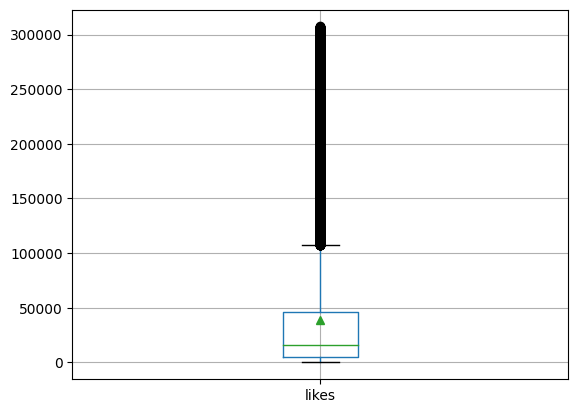

In [30]:
df_filtered.boxplot(column=["likes"], showmeans=True)